# Fáza 1 - Prieskumná analýza


`Kupor Mykyta` - 40% a `Ilia Koiushev` - 60%


# 1. Základný opis dát spolu s ich charakteristikami

1. Analýza štruktúr dát:

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


### Dataset 88

In [139]:
session = pd.read_csv('data/session.csv', delimiter='\t')
session.head()

,pct_scroll_move_duration,pct_mouse_move,mouse_move_total_rel_distance,page_activity_duration,pct_scrandom,screen_width,ack,pct_mouse_click,pct_input,pct_click,...,user_id,scroll_move_total_rel_distance,pct_click_product_info,session_duration,pct_wild_mouse,screen_height,session_start,pct_rage_click,wild_mouse_duration,pct_doubleclick
0,9.59904,7.68939,5.37487,8.36462,31.30541,800,0.0,9.13505,0.04125,9.68902,...,2181,11.36007,46.97437,66.07483,56.99436,800,2021-07-25 06:48:47,50.79621,13.68951,12.36846
1,7.53387,8.62357,9.09357,10.26733,53.09397,lower,1.0,8.63617,0.00756,12.24018,...,447,7.83061,47.09336,133.26423,19.65326,higher,2019-01-11 02:58:46,49.31536,11.98616,7.30068
2,8.27570,9.14421,7.75349,11.57870,37.21614,lower,1.0,8.69043,0.01219,10.83064,...,1958,8.30039,25.37883,97.32817,18.45055,768,2020-11-29 07:57:48,36.50380,12.46916,7.71466
3,9.38995,9.19876,7.21016,6.81575,56.69968,higher,0.0,9.37578,0.00616,11.86437,...,1195,9.38410,47.34555,120.87960,35.62900,600,2019-08-25 20:50:57,55.56358,11.78585,12.05817
4,8.50961,9.03280,8.92165,7.77596,58.27990,1366,0.0,9.91178,0.00026,11.65294,...,1241,7.14706,35.27738,128.79379,61.64424,800,2019-02-14 23:18:06,63.49090,8.42849,12.72820


In [140]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11100 entries, 0 to 11099
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_scroll_move_duration        11089 non-null  float64
 1   pct_mouse_move                  11089 non-null  float64
 2   mouse_move_total_rel_distance   11089 non-null  float64
 3   page_activity_duration          11089 non-null  float64
 4   pct_scrandom                    11089 non-null  float64
 5   screen_width                    11100 non-null  object 
 6   ack                             11100 non-null  float64
 7   pct_mouse_click                 11089 non-null  float64
 8   pct_input                       11089 non-null  float64
 9   pct_click                       11088 non-null  float64
 10  session_id                      11100 non-null  int64  
 11  product_ean                     11100 non-null  int64  
 12  browser_name                    

In [141]:
print('session.shape:', session.shape)

session.shape: (11100, 25)


In [142]:
product = pd.read_csv('data/product.csv', delimiter='\t')
product.head()

,code,store_name,location,product_ean
0,CN,Tianfu,Asia/Shanghai,3219884099674
1,MA,Azrou,Africa/Casablanca,4361569838852
2,PK,Jhol,Asia/Karachi,943609752911
3,US,New City,America/Chicago,1160422163567
4,TN,Msaken,Africa/Tunis,8865331741532


In [143]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14968 entries, 0 to 14967
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   code         14959 non-null  object
 1   store_name   14968 non-null  object
 2   location     14968 non-null  object
 3   product_ean  14968 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 467.9+ KB


In [144]:
print('product.shape:', product.shape)

product.shape: (14968, 4)


In [145]:
user = pd.read_csv('data/user.csv', delimiter='\t')
user.head()

,race,user_id,registration,sex,name,job,username,birthdate,mail,residence,address
0,unspecified,2043,2021/06/09,NaN,Guilherme Vieira,NaN,benjamincardoso,NaN,bernardoda-costa@gmail.com,Colônia Cunha\nSão Bernardo\n82378944 Ribeiro ...,"Estação Alana Azevedo, 1\nVila Nova Paraíso\n4..."
1,NaN,765,28 Jun 2018,NaN,Bradley Allen,Mental health nurse,richard34,NaN,marcusgonzalez@hotmail.com,"508 Brian Passage Suite 633\nDianafurt, RI 48847","623 Baker Shores\nNorth Andreatown, NM 02736"
2,NaN,1813,13 Jul 2018,NaN,Kamila Holubová,Event organiser,krizovanikol,NaN,marcel49@volny.cz,Boční I 39\n575 30 Veltrusy,Kováříkova 363\n366 16 Libčice nad Vltavou
3,black,2243,2022-06-13,NaN,Marissa Poerio-Lattuada,NaN,morriconesylvia,1911-10-05,vittoria42@poste.it,NaN,"Via Cipriano, 1 Appartamento 8\n98137, Santo S..."
4,NaN,1328,21 Jan 2019,NaN,Lubomír Doležal,Marketing executive,cermakovabarbora,1962-05-17,ivanakrizova@post.cz,Bermanova 27\n762 59 Štětí,NaN


In [146]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2532 entries, 0 to 2531
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   race          760 non-null    object
 1   user_id       2532 non-null   int64 
 2   registration  2532 non-null   object
 3   sex           1266 non-null   object
 4   name          2532 non-null   object
 5   job           1013 non-null   object
 6   username      2532 non-null   object
 7   birthdate     1393 non-null   object
 8   mail          2532 non-null   object
 9   residence     886 non-null    object
 10  address       2152 non-null   object
dtypes: int64(1), object(10)
memory usage: 217.7+ KB


In [147]:
print('user.shape:', user.shape)

user.shape: (2532, 11)


2. Analýza jednotlivých atribútov

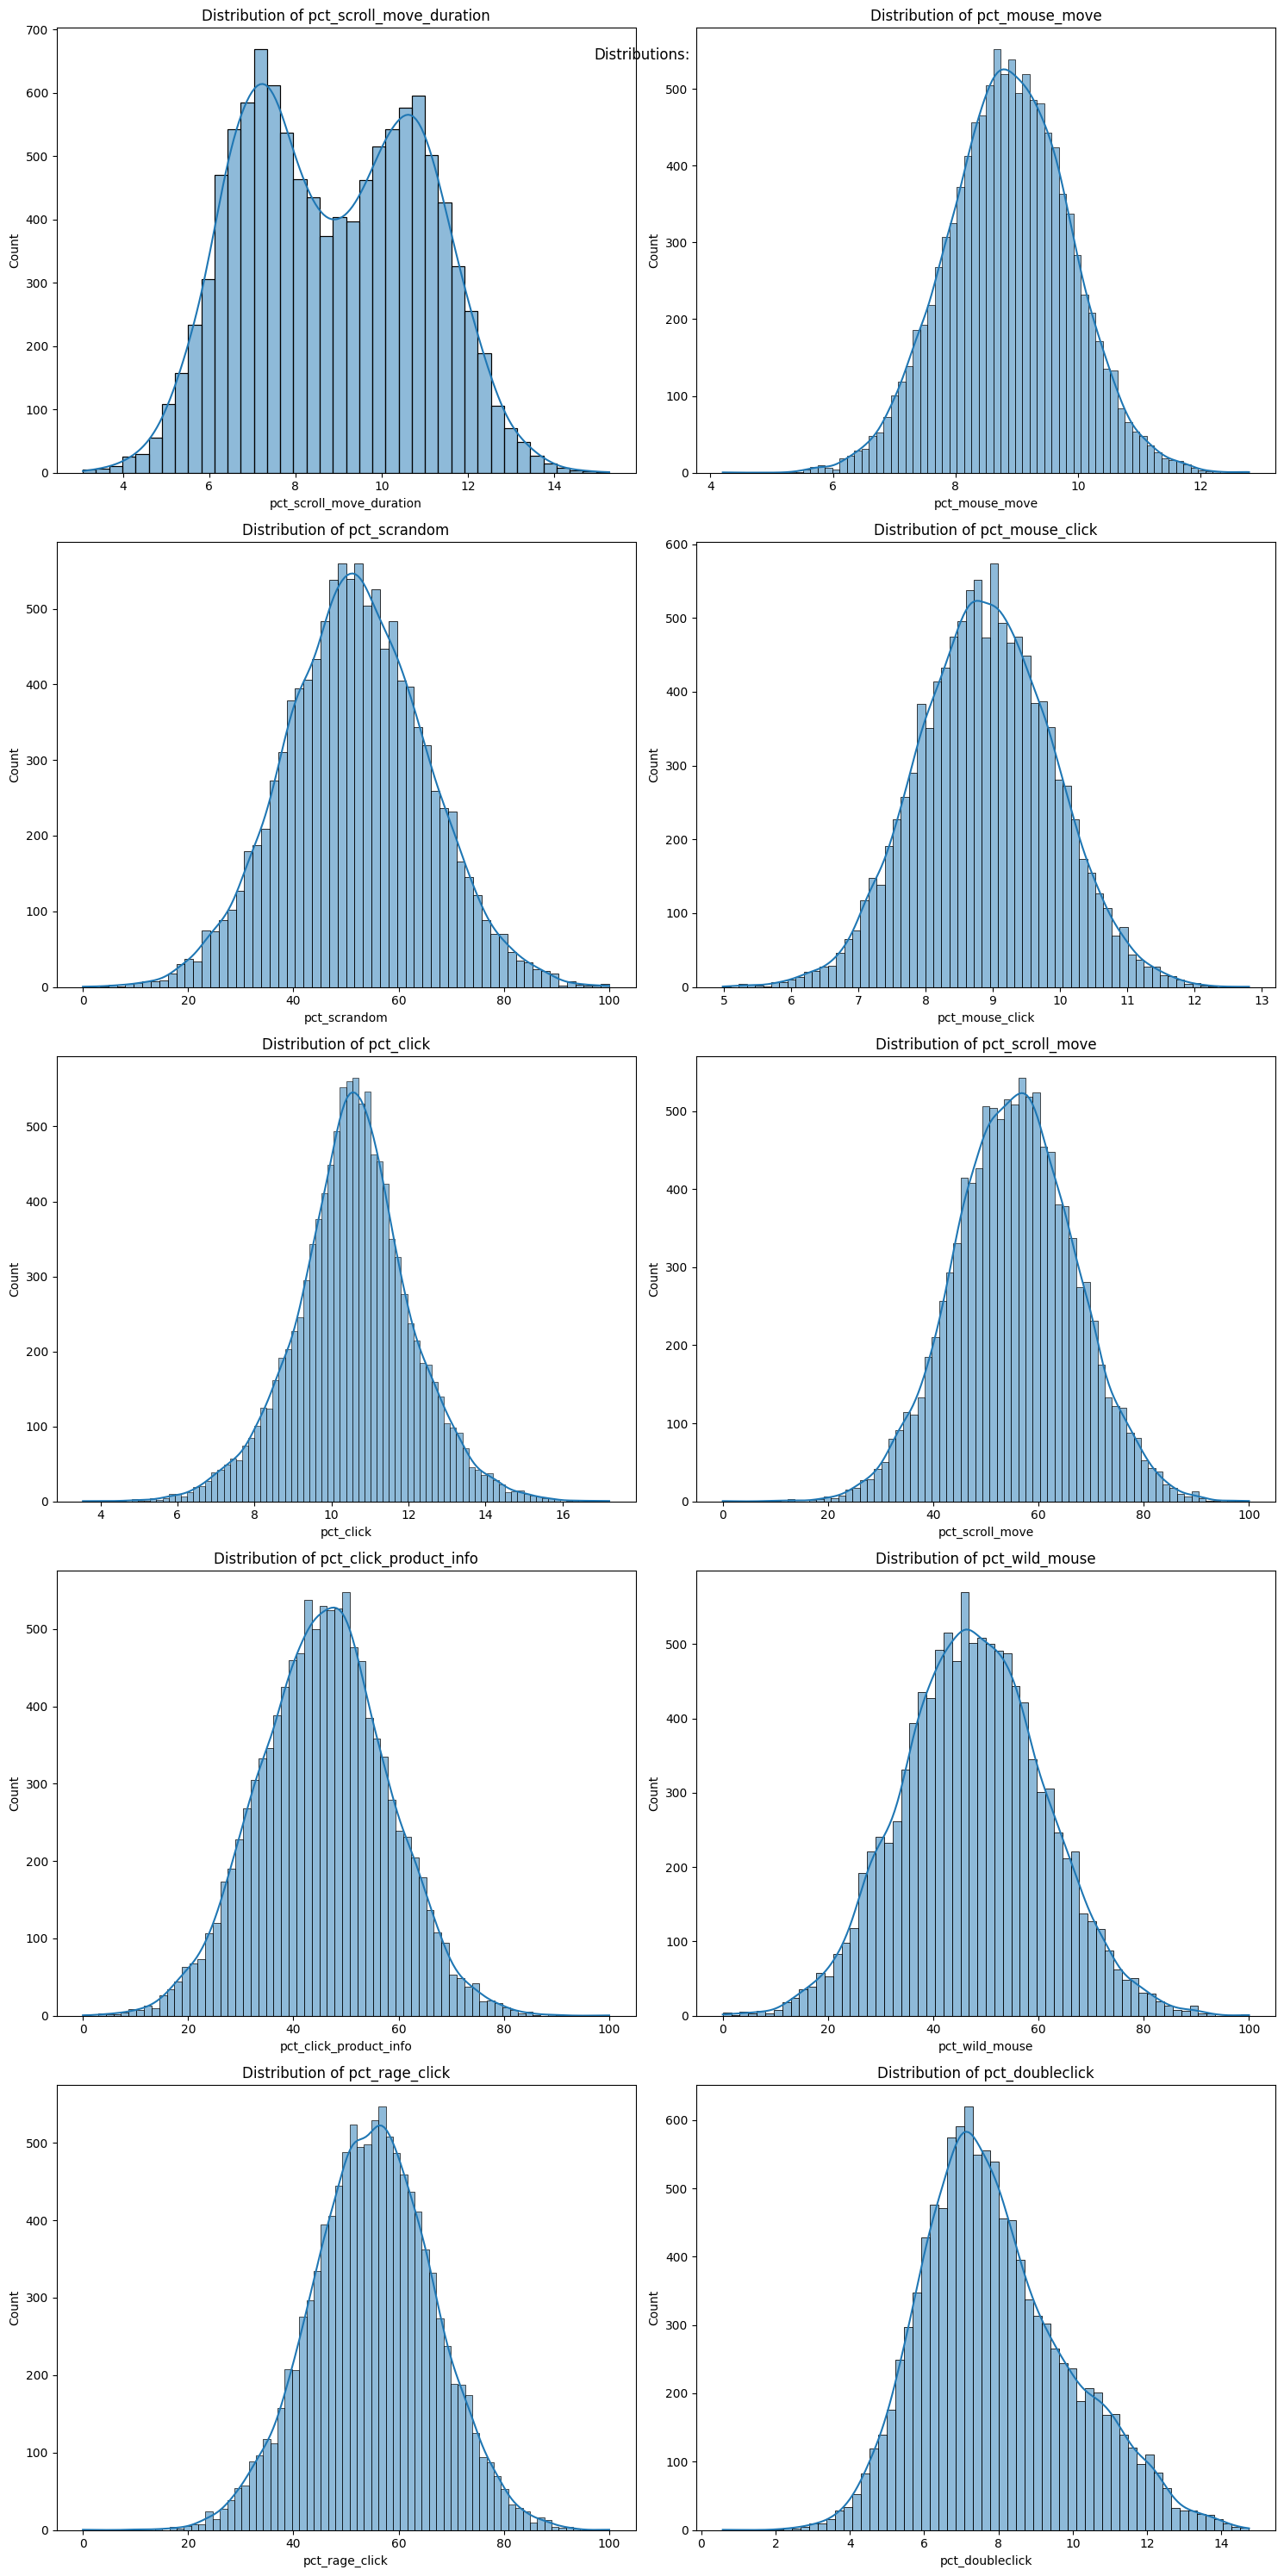

In [148]:
selected_attributes = ['pct_scroll_move_duration', 'pct_mouse_move', 'pct_scrandom',
                       'pct_mouse_click', 'pct_click',
                       'pct_scroll_move', 'pct_click_product_info', 'pct_wild_mouse',
                       'pct_rage_click', 'pct_doubleclick']

# Create subplots
fig, axes = plt.subplots(nrows=len(selected_attributes)//2, ncols=2, figsize=(15, 30))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through selected attributes
for i, attribute in enumerate(selected_attributes):
    if i < len(axes):  # Add this check to ensure you don't exceed the number of subplots
        sns.histplot(session[attribute], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {attribute}')

# Adjust layout
plt.tight_layout()
plt.suptitle('Distributions:')

# Show the plot
plt.show()



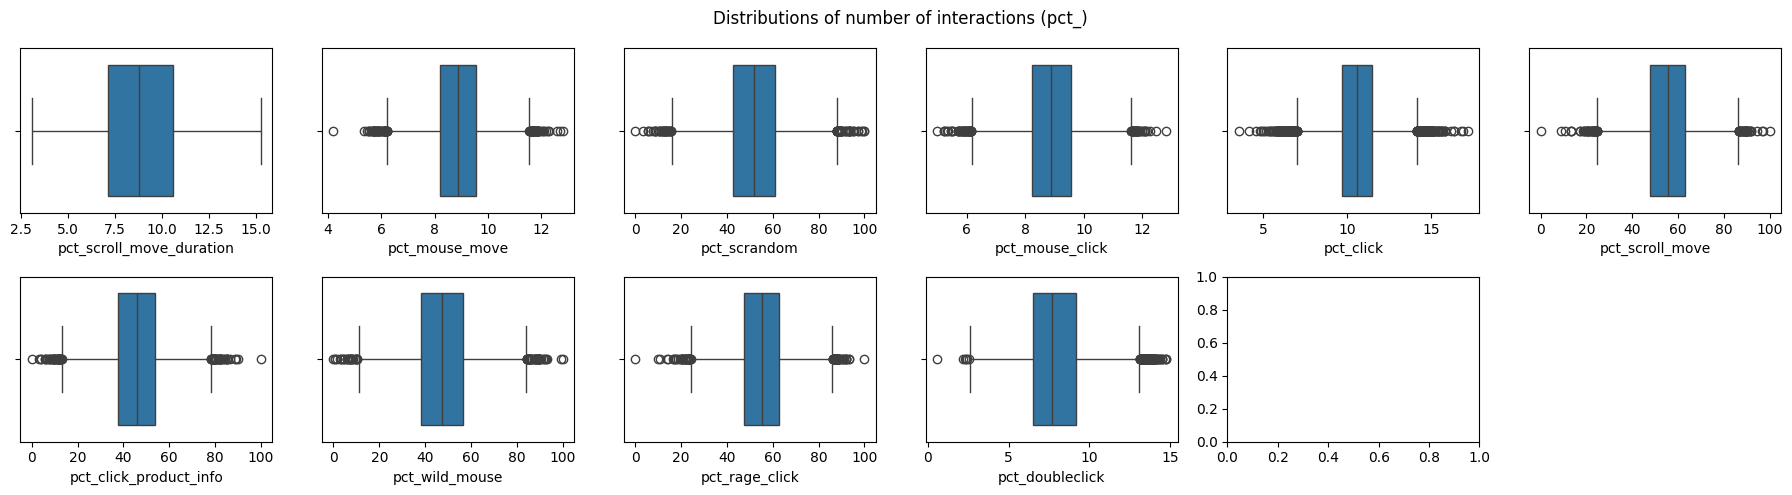

In [149]:
fig, ax = plt.subplots(2, 6, figsize=(18, 5))
ax = ax.flatten()

for i, c in enumerate(selected_attributes):
    sns.boxplot(data=session, x=c, ax=ax[i])

fig.suptitle('Distributions of number of interactions (pct_)')
fig.delaxes(ax[11])
fig.tight_layout()
plt.show()

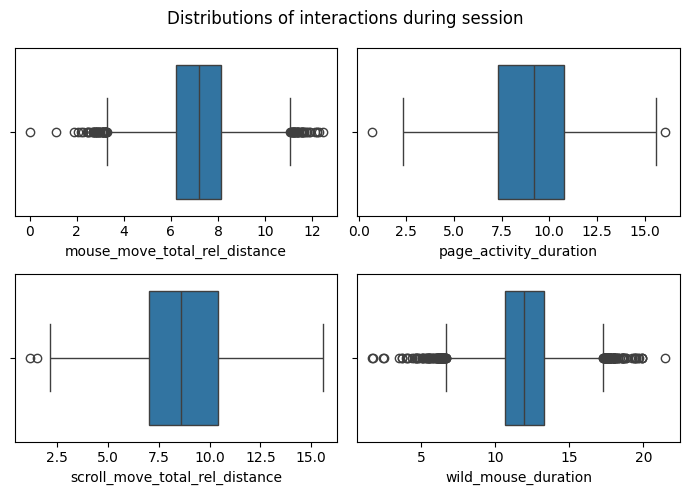

In [150]:
fig, ax = plt.subplots(2, 2, figsize=(7, 5))
ax = ax.flatten()

for i, c in enumerate(['mouse_move_total_rel_distance', 'page_activity_duration',
                       'scroll_move_total_rel_distance', 'wild_mouse_duration']):
    sns.boxplot(data=session, x=c, ax=ax[i])

fig.suptitle('Distributions of interactions during session')
fig.tight_layout()
plt.show()

In [151]:
# Get basic descriptive statistics
selected_data = session[selected_attributes]
statistic = selected_data.describe()
statistic

,pct_scroll_move_duration,pct_mouse_move,pct_scrandom,pct_mouse_click,pct_click,pct_scroll_move,pct_click_product_info,pct_wild_mouse,pct_rage_click,pct_doubleclick
count,11089.000000,11089.000000,11089.000000,11089.000000,11088.000000,11089.000000,11089.000000,11089.000000,11089.000000,11089.000000
mean,8.863328,8.869746,51.834695,8.892028,10.576188,55.484989,45.745217,47.581786,55.114312,7.934614
std,2.070682,1.000283,13.445601,1.005343,1.503111,11.504702,12.210080,13.578402,11.581450,1.991348
min,3.072970,4.200530,0.000000,4.982420,3.544250,0.000000,0.000000,0.000000,0.000000,0.577710
25%,7.149960,8.210180,42.763390,8.210940,9.681677,47.743630,37.551950,38.384280,47.375600,6.538070
50%,8.799820,8.872130,51.712620,8.888520,10.579185,55.534770,45.863560,47.378430,55.231740,7.658610
75%,10.590910,9.546220,60.811730,9.573020,11.467913,63.148590,53.769410,56.653100,62.858730,9.159700
max,15.273650,12.794460,100.000000,12.814200,17.211580,100.000000,100.000000,100.000000,100.000000,14.746930


3. Párová analýza dát:

In [152]:
selected_data = session[selected_attributes]

# Calculate correlations
correlations = selected_data.corr()

# Display correlation matrix
correlations


,pct_scroll_move_duration,pct_mouse_move,pct_scrandom,pct_mouse_click,pct_click,pct_scroll_move,pct_click_product_info,pct_wild_mouse,pct_rage_click,pct_doubleclick
pct_scroll_move_duration,1.000000,0.020422,-0.005323,-0.011882,-0.161384,0.003352,-0.003045,0.005432,0.002284,0.337631
pct_mouse_move,0.020422,1.000000,-0.005942,0.005868,0.001649,-0.012905,0.000119,0.001410,-0.018629,0.004313
pct_scrandom,-0.005323,-0.005942,1.000000,-0.002728,-0.006444,0.008549,0.007164,0.001370,0.000734,-0.013985
pct_mouse_click,-0.011882,0.005868,-0.002728,1.000000,0.008440,0.011533,-0.001500,-0.012699,0.010973,0.000274
pct_click,-0.161384,0.001649,-0.006444,0.008440,1.000000,-0.000030,0.006995,0.007304,0.007486,0.202018
pct_scroll_move,0.003352,-0.012905,0.008549,0.011533,-0.000030,1.000000,0.006732,0.004598,-0.001369,-0.007142
pct_click_product_info,-0.003045,0.000119,0.007164,-0.001500,0.006995,0.006732,1.000000,-0.008260,0.001814,-0.001463
pct_wild_mouse,0.005432,0.001410,0.001370,-0.012699,0.007304,0.004598,-0.008260,1.000000,0.004192,0.006083
pct_rage_click,0.002284,-0.018629,0.000734,0.010973,0.007486,-0.001369,0.001814,0.004192,1.000000,0.003848
pct_doubleclick,0.337631,0.004313,-0.013985,0.000274,0.202018,-0.007142,-0.001463,0.006083,0.003848,1.000000


There are no much correlated variables in this dataset. Columns which are correlated with column `ack` are: `wild_mouse_duration`, `pct_doubleclick`, `scroll_move_total_rel_distance`, `page_activity_duration`.

In [153]:
selected_attributes = [
    'pct_scroll_move_duration', 'pct_mouse_move', 'mouse_move_total_rel_distance',
    'page_activity_duration', 'pct_scrandom', 'pct_mouse_click',
    'pct_click', 'total_load_time', 'pct_scroll_move', 'scroll_move_total_rel_distance',
    'pct_click_product_info', 'session_duration', 'wild_mouse_duration',
    'pct_doubleclick', 'ack'
]

selected_data = session[selected_attributes]

correlations = selected_data.corr()['ack'].sort_values(ascending=False)


print(correlations)

ack                               1.000000
page_activity_duration            0.710296
total_load_time                   0.012219
pct_scroll_move                   0.009639
pct_mouse_move                    0.005855
mouse_move_total_rel_distance     0.004392
pct_scroll_move_duration          0.004375
pct_scrandom                      0.001609
pct_click                        -0.001817
pct_mouse_click                  -0.002547
pct_click_product_info           -0.005612
session_duration                 -0.011340
wild_mouse_duration              -0.357072
pct_doubleclick                  -0.395048
scroll_move_total_rel_distance   -0.710558
Name: ack, dtype: float64


`session` dataset and `product` dataset have common column `product_ean`.

In [154]:
len(list(set(session['product_ean']) & set(product['product_ean'])))

0

`session['product_ean']` and `product['product_ean']` have no common columns, so we probably won't be able to combine two datasets.

`session` dataset and `user` dataset have commmon column `user_id`.

In [155]:
len(list(set(session['user_id']) & set(user['user_id'])))

1570

`session['user_id']` and `product['user_id']` have 1567 common columns, so maybe we can combine these two datasets.

# 2. Identifikácia problémov v dátach s prvotným riešením

## Data Cleaning: `session`

In [156]:
print(f'Ratio of missing values in columns:\n')
session.isnull().sum() / len(session)

Ratio of missing values in columns:



pct_scroll_move_duration          0.000991
pct_mouse_move                    0.000991
mouse_move_total_rel_distance     0.000991
page_activity_duration            0.000991
pct_scrandom                      0.000991
screen_width                      0.000000
ack                               0.000000
pct_mouse_click                   0.000991
pct_input                         0.000991
pct_click                         0.001081
session_id                        0.000000
product_ean                       0.000000
browser_name                      0.000000
total_load_time                   0.000000
pct_scroll_move                   0.000991
user_id                           0.000000
scroll_move_total_rel_distance    0.000991
pct_click_product_info            0.000991
session_duration                  0.000000
pct_wild_mouse                    0.000991
screen_height                     0.000000
session_start                     0.000000
pct_rage_click                    0.000991
wild_mouse_

In [157]:
session = session.dropna()

In [158]:
session.shape

(10933, 25)

In [159]:
session.describe()

,pct_scroll_move_duration,pct_mouse_move,mouse_move_total_rel_distance,page_activity_duration,pct_scrandom,ack,pct_mouse_click,pct_input,pct_click,session_id,...,total_load_time,pct_scroll_move,user_id,scroll_move_total_rel_distance,pct_click_product_info,session_duration,pct_wild_mouse,pct_rage_click,wild_mouse_duration,pct_doubleclick
count,10933.000000,10933.000000,10933.000000,10933.000000,10933.000000,10933.000000,10933.000000,10933.000000,10933.000000,1.093300e+04,...,10933.000000,10933.000000,10933.000000,10933.000000,10933.000000,10933.000000,10933.000000,10933.000000,10933.000000,10933.000000
mean,8.865058,8.870096,7.183357,9.057621,51.841824,0.544407,8.890268,0.077793,10.574105,7.426372e+05,...,3.947908,55.454799,1242.550809,8.709454,45.744097,150.404183,47.600109,55.120889,11.982567,7.934893
std,2.070823,1.000203,1.444668,2.221266,13.438037,0.498047,1.006631,0.574084,1.500998,4.303990e+05,...,2.824254,11.512263,719.749178,2.201707,12.218481,59.064729,13.588035,11.582371,2.060974,1.990581
min,3.072970,4.200530,0.000000,0.696780,0.000000,0.000000,4.982420,0.000000,3.544250,1.016000e+03,...,0.016040,0.000000,0.000000,1.134530,0.000000,-109.714210,0.000000,0.000000,1.668660,0.577710
25%,7.150850,8.210180,6.199050,7.333060,42.767760,0.000000,8.209520,0.002000,9.682020,3.658410e+05,...,1.863080,47.741260,618.000000,7.000520,37.527550,110.654730,38.412360,47.399560,10.641380,6.540820
50%,8.802650,8.872130,7.195380,9.202600,51.715420,1.000000,8.884720,0.007100,10.577730,7.423300e+05,...,3.296360,55.475900,1244.000000,8.613780,45.851050,150.235880,47.386320,55.231820,11.925220,7.657230
75%,10.592720,9.547840,8.139910,10.771540,60.862820,1.000000,9.569640,0.027810,11.467730,1.115140e+06,...,5.318050,63.117200,1862.000000,10.427630,53.783620,190.662920,56.682960,62.874590,13.294620,9.159390
max,15.273650,12.794460,12.452580,16.089860,99.824870,1.000000,12.814200,20.479330,17.211580,1.499929e+06,...,23.733920,100.000000,2499.000000,15.576910,100.000000,387.116680,100.000000,100.000000,19.898440,14.746930


Replace values `lower` and `higher` in `screen_width` column by 0 and 1 respectively, so we can transform full column to int datatype:

In [160]:
map_screen = {'lower': 0, 'higher': 1}

session['screen_width'] = session['screen_width'].replace(map_screen)
session['screen_width'] = session['screen_width'].astype(int)
session['screen_width'].unique()

array([ 800,    0,    1, 1366, 1280, 1024, 1920])

Make the same procedure for the `screen_height` column:

In [161]:
session['screen_height'] = session['screen_height'].replace(map_screen)
session['screen_height'] = session['screen_height'].astype(int)
session['screen_height'].unique()

array([ 800,    1,  768,  600, 1024, 1080,    0])

Transform column `session_start` to datetime object:

In [162]:
session['session_start'] = pd.to_datetime(session['session_start'])

Identify and drop `outliers`:

In [163]:
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    
    return a[(a > upper) | (a < lower)]

In [164]:
numeric_attributes = session.select_dtypes(include=['float64', 'int64']).columns.tolist()

for attribute in numeric_attributes:
    outliers = identify_outliers(session['total_load_time'])

    # Inverse condition to keep only rows without outliers
    #session = session[~session.index.isin(outliers.index)]

## Data Cleaning: `product`

In [165]:
print(f'Ratio of missing values in columns:\n')
product.isnull().sum() / len(product)

Ratio of missing values in columns:



code           0.000601
store_name     0.000000
location       0.000000
product_ean    0.000000
dtype: float64

In [166]:
product = product.dropna()

Split column `location` by `region` and `city` columns, then drop the `location` column:

In [167]:
region_city = product['location'].str.split('/', n=1, expand=True)
product.loc[:, 'region'] = region_city[0]
product.loc[:, 'city'] = region_city[1]
product = product.drop('location', axis=1)

Replace values in the new columns that have uncorrect results:

In [168]:
map_city = {'Argentina/Cordoba': 'Cordoba', 'Argentina/Tucuman': 'Tucuman',
            'Indiana/Indianapolis': 'Indianapolis', 'Argentina/Ushuaia': 'Ushuaia',
            'Argentina/Buenos Aires': 'Buenos Aires'}
product['city'] = product['city'].replace(map_city)
product['city'] = product['city'].str.replace('_', ' ')

## Data Cleaning: `user`

In [169]:
print(f'Ratio of missing values in columns:\n')
user.isnull().sum() / len(user)

Ratio of missing values in columns:



race            0.699842
user_id         0.000000
registration    0.000000
sex             0.500000
name            0.000000
job             0.599921
username        0.000000
birthdate       0.449842
mail            0.000000
residence       0.650079
address         0.150079
dtype: float64

`race` column has 69% `NaN`s plus ~10% of unspecified values, which gives 79% missing values in column. This column can be dropped.

In [170]:
user = user.drop('race', axis=1)

In [171]:
user['sex'].value_counts(dropna=False)

sex
NaN    1266
M       646
F       620
Name: count, dtype: int64

In [172]:
user.sort_values(by='job')['job'].unique()

array(['Academic librarian', 'Accommodation manager',
       'Accountant, chartered', 'Accountant, chartered certified',
       'Accountant, chartered public finance', 'Accounting technician',
       'Acupuncturist', 'Administrador público', 'Administrator',
       'Administrator, arts', 'Administrator, education',
       'Administrator, local government', 'Adult guidance worker',
       'Advertising art director', 'Advertising copywriter',
       'Aeronautical engineer', 'Agente de combate à endemias',
       'Agente de viagens', 'Agente penitenciário',
       'Agricultural consultant', 'Agricultural engineer', 'Aid worker',
       'Air broker', 'Air cabin crew', 'Airline pilot', 'Alergologista',
       'Altenpfleger', 'Amenity horticulturist',
       'Amolador de ferramentas', 'Angiologista', 'Animal nutritionist',
       'Apontador de mão-de-obra', 'Arboriculturist', 'Archaeologist',
       'Architect', 'Architectural technologist',
       'Armed forces operational officer',
       

In [173]:
user.sort_values(by='residence')['residence'].unique()

array(['00040 Smith Pine Suite 606\nNew Jason, TX 12679',
       '00410 Alexandria Station Apt. 227\nPort Ryan, OK 87737',
       '0082 Knight Neck\nWest Melinda, ND 17877',
       '01777 Simmons Neck Apt. 139\nJoshuastad, TN 06336',
       '019 Aaron Well\nNorth Rhonda, TX 24775',
       '02461 Burke Hollow\nFisherhaven, MN 72605',
       '02745 Steven Mountains Apt. 960\nPort Donnatown, HI 77749',
       '034 Sean Circle\nBrownbury, GA 05027',
       '036 Foster Shore Suite 354\nNew Patrick, MI 56031',
       '0480 Maria Flat Suite 589\nWest Dawn, MT 11805',
       '05229 Jasmine Junctions Suite 082\nNorth Ashley, ID 38006',
       '0539 Annette Unions\nGainesshire, TX 65465',
       '0694 James Circle Suite 189\nBrownfurt, MI 09835',
       '0976 Penny Spring Apt. 042\nWongport, CA 62316',
       '1163 Angela Drive Apt. 990\nAlvaradoton, MD 89819',
       '125 Teresa View Apt. 831\nAliciaberg, GA 74700',
       '1322 Michelle Parks Apt. 103\nPort Cynthia, MS 72403',
       '1423 Jac

The `user` data has the following problems:
* `registration` column have a dates of different formats (`2022.6.19` but `28 jun. 2013` in the next row)
* `race` column has a lot of missing data, so it doesn't give us much information
* `sex` and `job` column has 50% of missing data, so we must fill in NaNs
* `job` column has a lot of categorical data, so it probably could be shrinked
* `job` column  has non-english data
* `name` column also has non-english data
* `residence` column is a string-value column, so it should be transformed somehow for further purposes

# 3. Formulácia a štatistické overenie hypotéz o dátach

**$H_0$: Mean `scroll_move_total_rel_distance` during session have lower value when buying.**

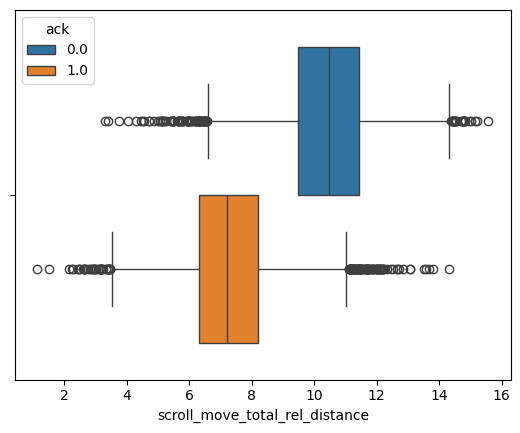

In [174]:
sns.boxplot(data=session, x='scroll_move_total_rel_distance', hue='ack')
plt.show()

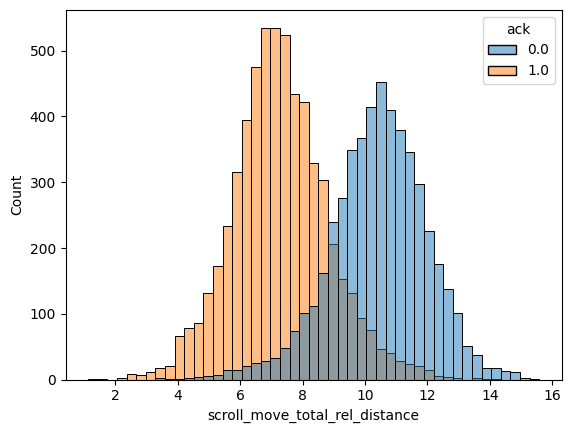

In [175]:
sns.histplot(data=session, x='scroll_move_total_rel_distance', hue='ack')
plt.show()

In [176]:
session_ack0 = session[session['ack'] == 0]['scroll_move_total_rel_distance']
session_ack1 = session[session['ack'] == 1]['scroll_move_total_rel_distance']

In [177]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(session_ack0, session_ack1)
print(f'Statistics={stat:}, p={p}')

if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

Statistics=105.58189748334642, p=0.0
Probably different distributions


**We can accept $H_0$ hypothesis. The distributions are unequal and have different means.**

**$H_0$: Mean `page_activity_duration` during session have lower value when not buying.**

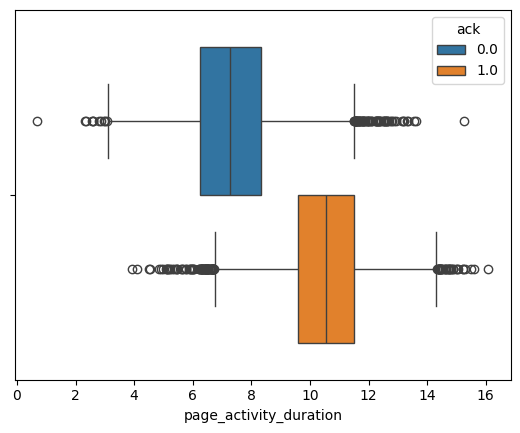

In [178]:
sns.boxplot(data=session, x='page_activity_duration', hue='ack')
plt.show()

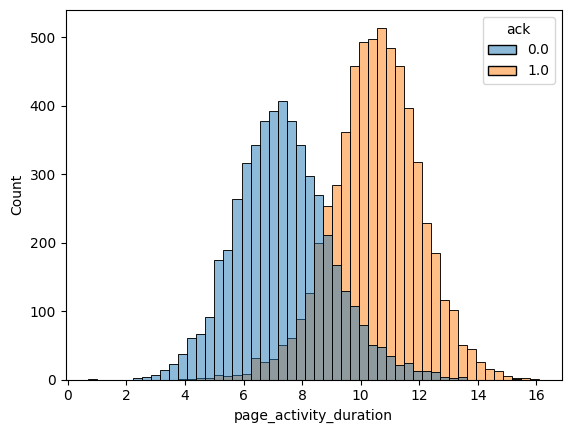

In [179]:
sns.histplot(data=session, x='page_activity_duration', hue='ack')
plt.show()

In [180]:
session_ack0 = session[session['ack'] == 0]['page_activity_duration']
session_ack1 = session[session['ack'] == 1]['page_activity_duration']

In [181]:
stat, p = ttest_ind(session_ack0, session_ack1)
print(f'Statistics={stat:}, p={p}')

if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

Statistics=-105.4128673905826, p=0.0
Probably different distributions


**We can accept $H_0$ hypothesis. The distributions are unequal and have different means.**

**$H_0$: `page_activity_duration` has a Gaussian distribution.**

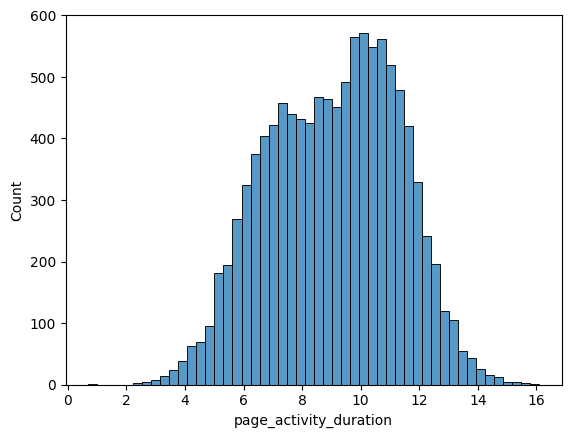

In [182]:
sns.histplot(data=session, x='page_activity_duration')
plt.show()

In [183]:
from scipy.stats import normaltest
stat, p = normaltest(session['page_activity_duration'])
print(f'Statistics={stat:}, p={p}')

if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

Statistics=421.96968348184197, p=2.3466453896054024e-92
Probably not Gaussian


**We must discard $H_0$ hypothesis. The distribution of `page_activity_duration` is not Gaussian.**